Summary:
- Data was cleaned for missing values and outliers were capped.
- Numerical features were standardized; categorical features one-hot encoded.
- Dataset split into training and test sets with stratification.
- SMOTE applied on training set to address class imbalance.
- Multiple classifiers were trained: Logistic Regression, Decision Tree, SVM, and Deep Neural Network.
- Deep learning model showed promising accuracy with early stopping.

# 1. LIBRARIES INSTALLATION & IMPORTS


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
import warnings
warnings.filterwarnings('ignore')

print("All required libraries imported successfully.")

All required libraries imported successfully.


# 2. READING DATA

In [10]:
df = pd.read_csv('2018_Financial_Data.csv')  # Change to your dataset path
print("\nDataset Loaded Successfully. Displaying first 5 rows:")
display(df.head())


Dataset Loaded Successfully. Displaying first 5 rows:


,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [11]:
print("\nBasic info about data types and null counts:")
print(df.info())


Basic info about data types and null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB
None


In [12]:
print(df.describe())

            Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  4.346000e+03     4253.000000     4.207000e+03  4.328000e+03   
mean   5.119287e+09        3.455278     3.144946e+09  2.043954e+09   
std    2.049504e+10      195.504906     1.508813e+10  7.682369e+09   
min   -6.894100e+07       -3.461500    -2.669055e+09 -1.818220e+09   
25%    6.501425e+07        0.000000     3.415500e+06  3.618903e+07   
50%    4.982640e+08        0.074900     1.741180e+08  2.219470e+08   
75%    2.457878e+09        0.188500     1.297814e+09  9.767015e+08   
max    5.003430e+11    12739.000000     3.733960e+11  1.269470e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  4.155000e+03  4.226000e+03        4.208000e+03      4.357000e+03   
mean   1.180176e+08  9.005022e+08        1.435546e+09      6.541207e+08   
std    9.330891e+08  3.661116e+09        5.529831e+09      2.969341e+09   
min   -1.042000e+08 -1.401594e+08       -4.280000e+09     -1.455700e+

In [13]:
print(f"Columns: {df.columns.tolist()}")

Columns: ['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income', 'Interest Expense', 'Earnings before Tax', 'Income Tax Expense', 'Net Income - Non-Controlling int', 'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends', 'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)', 'Dividend per Share', 'Gross Margin', 'EBITDA Margin', 'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin', 'Net Profit Margin', 'Cash and cash equivalents', 'Short-term investments', 'Cash and short-term investments', 'Receivables', 'Inventories', 'Total current assets', 'Property, Plant & Equipment Net', 'Goodwill and Intangible Assets', 'Long-term investments', 'Tax assets', 'Total non-current assets', 'Total assets', 'Payables', 'Short-term debt', 'Total current liabilities', 'Long

In [14]:
df.tail()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
4387,YRIV,0.0,0.0000,0.0,0.0,0.0,3755251.0,3755251.0,-3755251.0,11058486.0,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,556000.0,-0.4110,0.0,556000.0,4759000.0,5071000.0,9830000.0,-9274000.0,0.0,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,54884381.0,0.2210,36593792.0,18290589.0,1652633.0,7020320.0,8672953.0,9617636.0,1239170.0,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.0,0.0000,0.0,0.0,10317153.0,4521349.0,16648628.0,-16648628.0,0.0,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0
4391,ZYME,53019000.0,0.0243,0.0,53019000.0,56684000.0,29457000.0,86146000.0,-33127000.0,166000.0,...,-0.4185,0.0000,0.8519,0.1325,0.0000,0.3577,0.5880,Healthcare,209.462222,1


In [15]:
df.shape

(4392, 225)

In [16]:
df.sample()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
3276,WHG,122300000.0,-0.0858,0.0,122300000.0,0.0,71459000.0,89153000.0,33147000.0,0.0,...,-0.1492,0.0,0.0339,0.0036,0.0,0.0,-0.0677,Financial Services,-8.601426,0


# 3. EXPLORATORY DATA ANALYSIS (EDA)
- Check target variable distribution
- Check number of missing values per column
- Identify numerical and categorical features
-  Sector is a categorical feature we will encode later



Target variable ('Class') distribution:
Class
1    3046
0    1346
Name: count, dtype: int64


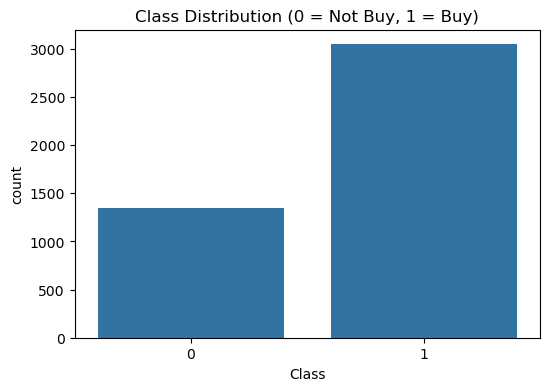

In [18]:
print("\nTarget variable ('Class') distribution:")
print(df['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Not Buy, 1 = Buy)')
plt.show()


In [19]:
missing_counts = df.isnull().sum()
missing_percents = 100 * missing_counts / len(df)
missing_df = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percent': missing_percents})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percent', ascending=False)
print("\nColumns with missing values sorted by percent:")
display(missing_df)


Columns with missing values sorted by percent:


,Missing Count,Missing Percent
operatingCycle,4386,99.863388
cashConversionCycle,4386,99.863388
shortTermCoverageRatios,1926,43.852459
10Y Shareholders Equity Growth (per Share),1695,38.592896
dividendPayoutRatio,1658,37.750455
...,...,...
Operating Income,35,0.796903
Long-term debt,30,0.683060
Net cash flow / Change in cash,24,0.546448
Retained earnings (deficit),21,0.478142


In [20]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nTotal numerical columns: {len(num_cols)}")
print(f"Total categorical columns: {len(cat_cols)}")


Total numerical columns: 223
Total categorical columns: 2


In [21]:
print(f"Categorical columns: {cat_cols}")


Categorical columns: ['Unnamed: 0', 'Sector']


# 4. DATA CLEANING
- Remove duplicate rows if any
- Check again for missing values after removing duplicates

In [23]:
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


In [24]:
print("\nMissing values count per column after duplicate removal:")
print(df.isnull().sum().sum())


Missing values count per column after duplicate removal:
97298


# 5. HANDLING MISSING VALUES

Strategy - For numerical features: impute with median,(robust to outlier
- - For categorical featurs: impute with modede

In [26]:
from sklearn.impute import SimpleImputer

num_cols.remove('Class')  # Target should not be imputed

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
if len(cat_cols) > 0:
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("\nAfter imputation, missing values count:")
print(df.isnull().sum().sum())  # Should be zero


After imputation, missing values count:
0


# 6. OUTLIER DETECTION AND TREATMENT

- Cap outliers at 1st and 99th percentile for numerical columns to reduce skewness and effect of extreme values
- Visualize one example feature's distribution before and after capping



In [28]:
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    before_outliers = df.shape[0]
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
print("\nOutliers capped at 1st and 99th percentiles for numerical features.")


Outliers capped at 1st and 99th percentiles for numerical features.


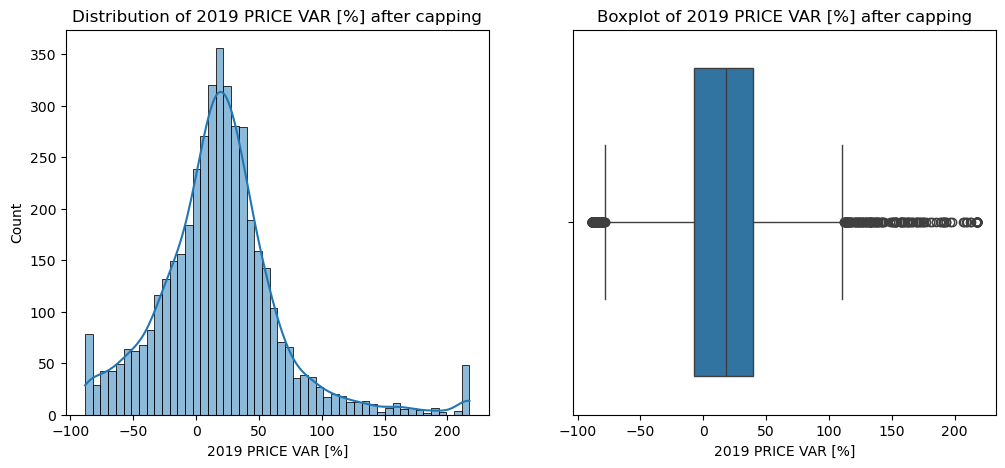

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df[col], bins=50, kde=True)
plt.title(f'Distribution of {col} after capping')
plt.subplot(1,2,2)
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col} after capping')
plt.show()

# 7. DATA TRANSFORMATION: SCALING & ENCODING

In [31]:
# Verify which categorical columns still exist
existing_cat_cols = [col for col in cat_cols if col in df.columns]

print(f"Categorical columns present for encoding: {existing_cat_cols}")

if existing_cat_cols:
    df = pd.get_dummies(df, columns=existing_cat_cols, drop_first=True)
    print(f"One-hot encoded columns: {existing_cat_cols}")
else:
    print("No categorical columns present for one-hot encoding.")


Categorical columns present for encoding: ['Unnamed: 0', 'Sector']
One-hot encoded columns: ['Unnamed: 0', 'Sector']


# 8. SPLIT DATA INTO FEATURES AND TARGET


Feature matrix shape: (4392, 4623)
Target vector shape: (4392,)


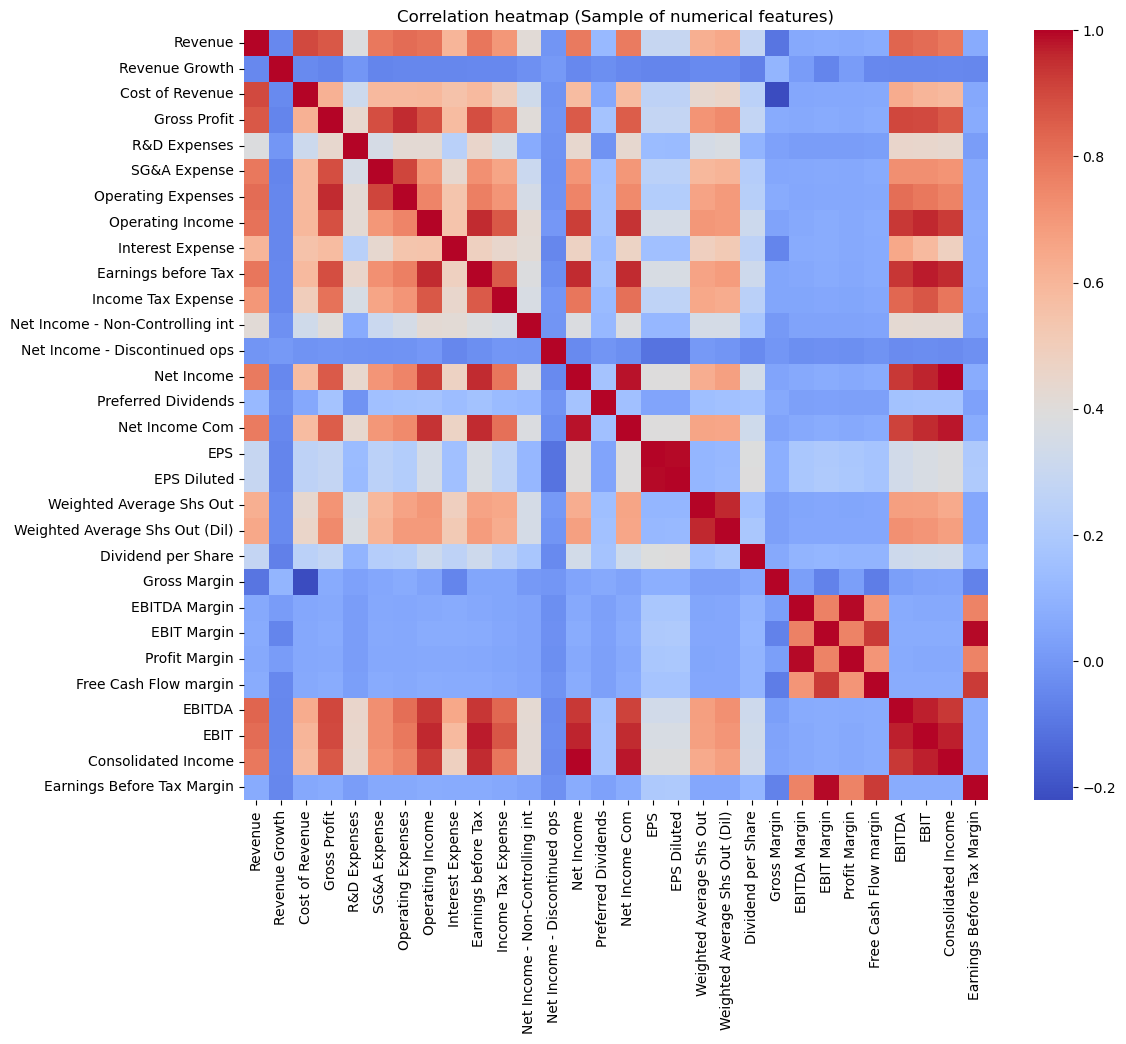

In [33]:
X = df.drop(columns=['Class'])
y = df['Class']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

sample_num_cols = num_cols[:30]
plt.figure(figsize=(12,10))
sns.heatmap(df[sample_num_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation heatmap (Sample of numerical features)')
plt.show()

# 9. TRAIN-TEST SPLIT

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 3513 samples
Test set size: 879 samples


In [37]:
print("\nClass distribution in training data:")
print(y_train.value_counts(normalize=True))


Class distribution in training data:
Class
1    0.693424
0    0.306576
Name: proportion, dtype: float64


# 10. HANDLING IMBALANCED DATA WITH SMOTE

In [39]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [40]:
print("\nAfter SMOTE oversampling:")
print(pd.Series(y_train_sm).value_counts(normalize=True))


After SMOTE oversampling:
Class
1    0.5
0    0.5
Name: proportion, dtype: float64


# 11. BUILDING AND EVALUATING MODELS

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} Performance ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.45      0.65      0.53       269
           1       0.81      0.64      0.72       610

    accuracy                           0.65       879
   macro avg       0.63      0.65      0.62       879
weighted avg       0.70      0.65      0.66       879



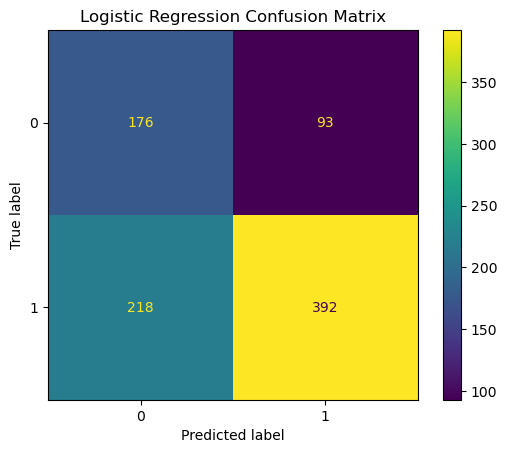

Accuracy: 0.6462


In [43]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)
evaluate_model(logreg, X_test, y_test, "Logistic Regression")


--- Decision Tree Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       610

    accuracy                           1.00       879
   macro avg       1.00      1.00      1.00       879
weighted avg       1.00      1.00      1.00       879



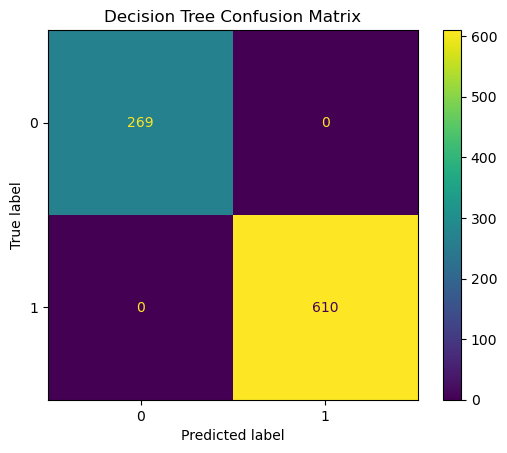

Accuracy: 1.0000


In [44]:

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_sm, y_train_sm)
evaluate_model(dtree, X_test, y_test, "Decision Tree")


--- SVM Performance ---
              precision    recall  f1-score   support

           0       0.39      0.88      0.54       269
           1       0.89      0.39      0.54       610

    accuracy                           0.54       879
   macro avg       0.64      0.64      0.54       879
weighted avg       0.73      0.54      0.54       879



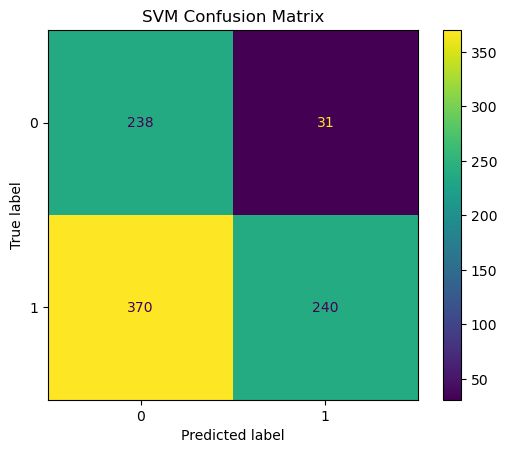

Accuracy: 0.5438


In [45]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_sm, y_train_sm)
evaluate_model(svm, X_test, y_test, "SVM")

# 12. ADVANCED: NEURAL NETWORK USING KERAS/TENSORFLOW

In [47]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sm.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [48]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_sm, y_train_sm, 
    epochs=50, batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/50
61/61 - 7s - 117ms/step - accuracy: 0.6005 - loss: 78809192.0000 - val_accuracy: 0.2667 - val_loss: 44236824.0000
Epoch 2/50
61/61 - 1s - 15ms/step - accuracy: 0.6325 - loss: 28506814.0000 - val_accuracy: 0.3405 - val_loss: 18113800.0000
Epoch 3/50
61/61 - 1s - 15ms/step - accuracy: 0.6100 - loss: 21699984.0000 - val_accuracy: 0.2923 - val_loss: 11364683.0000
Epoch 4/50
61/61 - 1s - 15ms/step - accuracy: 0.6064 - loss: 14798091.0000 - val_accuracy: 0.3179 - val_loss: 6985701.5000
Epoch 5/50
61/61 - 1s - 15ms/step - accuracy: 0.6251 - loss: 10627766.0000 - val_accuracy: 0.4021 - val_loss: 7880368.0000
Epoch 6/50
61/61 - 1s - 24ms/step - accuracy: 0.6318 - loss: 9080753.0000 - val_accuracy: 0.4205 - val_loss: 1934074.1250
Epoch 7/50
61/61 - 1s - 20ms/step - accuracy: 0.6030 - loss: 5991019.0000 - val_accuracy: 0.3969 - val_loss: 1458984.0000
Epoch 8/50
61/61 - 1s - 16ms/step - accuracy: 0.5999 - loss: 3947458.7500 - val_accuracy: 0.2738 - val_loss: 1459792.5000
Epoch 9/50
61/6

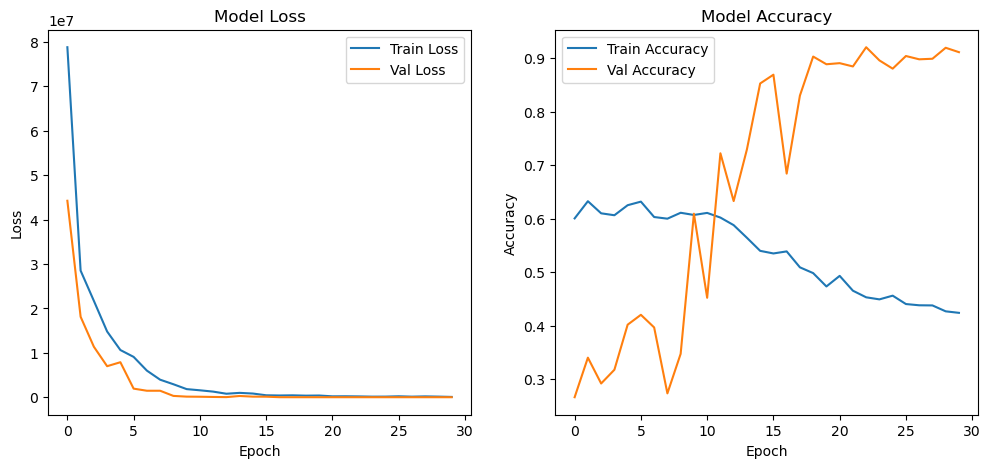

In [50]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.83      0.42       269
           1       0.39      0.05      0.09       610

    accuracy                           0.29       879
   macro avg       0.34      0.44      0.25       879
weighted avg       0.36      0.29      0.19       879



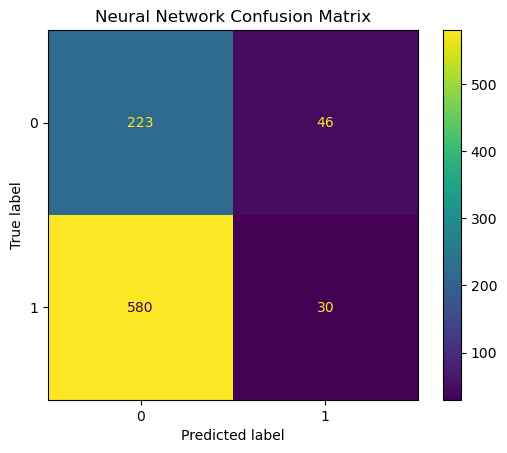

Neural Network Accuracy: 0.2878


In [52]:

y_pred_prob_nn = model.predict(X_test).ravel()
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn).plot()
plt.title('Neural Network Confusion Matrix')
plt.show()

print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")